In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import math
import random
from PIL import Image
from useful_functions_notebook_14to18 import *
from useful_functions_notebook_8to13 import variable_consistancy_check, mass_not_preserved_percentage_decrease, check_branch_length, analyze_data
import warnings
warnings.filterwarnings('ignore')
transform = transforms.Resize((29, 10))

In [3]:
nearest_exact = torch.load("../testing/interpolation/nearest_exact_consistent.pt")
dataset = torch.load("data/dataset_normalized_consistent_only.pt")

In [4]:

one_branch = []
two_branch = []
three_branch = []
four_branch = []
five_branch = []
six_branch = []
seven_branch = []
eight_branch = []
nine_branch = []
ten_branch = []

for datapoint in dataset:
    one_channel = datapoint[1]
    branches = torch.count_nonzero(one_channel, dim=0)
    num_branch = torch.count_nonzero(branches, dim=0)
    if num_branch == 1:
        one_branch.append(datapoint)
    elif num_branch == 2:
        two_branch.append(datapoint)
    elif num_branch == 3:
        three_branch.append(datapoint)
    elif num_branch == 4:
        four_branch.append(datapoint)
    elif num_branch == 5:
        five_branch.append(datapoint)
    elif num_branch == 6:
        six_branch.append(datapoint)
    elif num_branch == 7:
        seven_branch.append(datapoint)
    elif num_branch == 8:
        eight_branch.append(datapoint)
    elif num_branch == 9:
        nine_branch.append(datapoint)
    elif num_branch == 10:
        ten_branch.append(datapoint)
        
total = [one_branch, two_branch, three_branch, four_branch, five_branch,
         six_branch, seven_branch, eight_branch, nine_branch, ten_branch]

total_im = 0
for i, branch_list in enumerate(total):
    total_im += len(branch_list)
    print(f"number of images with {i + 1} branches is: {len(branch_list)}")
    
print(f"double check that all images are counted: total images is {total_im} = {dataset.shape[0]}")

number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 0
number of images with 5 branches is: 7575
number of images with 6 branches is: 8012
number of images with 7 branches is: 7138
number of images with 8 branches is: 5990
number of images with 9 branches is: 4757
number of images with 10 branches is: 3923
double check that all images are counted: total images is 37395 = 37395


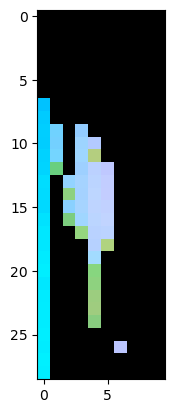

In [14]:
plt.imshow(nearest_exact[0].permute(1, 2, 0))
plt.show()

In [15]:

NE_one_branch = []
NE_two_branch = []
NE_three_branch = []
NE_four_branch = []
NE_five_branch = []
NE_six_branch = []
NE_seven_branch = []
NE_eight_branch = []
NE_nine_branch = []
NE_ten_branch = []

for datapoint in nearest_exact:
    one_channel = datapoint[1]
    branches = torch.count_nonzero(one_channel, dim=0)
    num_branch = torch.count_nonzero(branches, dim=0)
    if num_branch == 1:
        NE_one_branch.append(datapoint)
    elif num_branch == 2:
        NE_two_branch.append(datapoint)
    elif num_branch == 3:
        NE_three_branch.append(datapoint)
    elif num_branch == 4:
        NE_four_branch.append(datapoint)
    elif num_branch == 5:
        NE_five_branch.append(datapoint)
    elif num_branch == 6:
        NE_six_branch.append(datapoint)
    elif num_branch == 7:
        NE_seven_branch.append(datapoint)
    elif num_branch == 8:
        NE_eight_branch.append(datapoint)
    elif num_branch == 9:
        NE_nine_branch.append(datapoint)
    elif num_branch == 10:
        NE_ten_branch.append(datapoint)
        
NE_total = [NE_one_branch, NE_two_branch, NE_three_branch, NE_four_branch, NE_five_branch,
         NE_six_branch, NE_seven_branch, NE_eight_branch, NE_nine_branch, NE_ten_branch]

NE_total_im = 0
for i, branch_list in enumerate(NE_total):
    total_im += len(branch_list)
    print(f"number of images with {i + 1} branches is: {len(branch_list)}")
    
print(f"double check that all images are counted: total images is {NE_total_im} = {nearest_exact.shape[0]}")

number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 4
number of images with 5 branches is: 1164
number of images with 6 branches is: 1793
number of images with 7 branches is: 1693
number of images with 8 branches is: 1399
number of images with 9 branches is: 1390
number of images with 10 branches is: 1476
double check that all images are counted: total images is 0 = 8919


# six branches comparison

In [16]:
six_con, six_incon = check_consistency(six)
avg_branch = check_branch_length(six_con)



Percentage of consistant images = 100.00%
Complexity:
number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 0
number of images with 5 branches is: 0
number of images with 6 branches is: 8012
number of images with 7 branches is: 0
number of images with 8 branches is: 0
number of images with 9 branches is: 0
number of images with 10 branches is: 0

total images = 8012

average number of branches in an image = 6.00 vs. 7.12 in training data
Average branch length = 9.57 vs. 9.06 in training data
Average nonzero entries (progenitors) = 57.41 vs. 64.55 in training data





In [18]:
NE_six = torch.stack(NE_six_branch)
NE_six_con, six_incon = check_consistency(NE_six)
avg_branch = check_branch_length(NE_six_con)



Percentage of consistant images = 100.00%
Complexity:
number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 0
number of images with 5 branches is: 0
number of images with 6 branches is: 1793
number of images with 7 branches is: 0
number of images with 8 branches is: 0
number of images with 9 branches is: 0
number of images with 10 branches is: 0

total images = 1793

average number of branches in an image = 6.00 vs. 7.12 in training data
Average branch length = 10.10 vs. 9.06 in training data
Average nonzero entries (progenitors) = 60.62 vs. 64.55 in training data





# ten branches comparison

In [19]:
ten = torch.stack(ten_branch)
ten_con, ten_incon = check_consistency(ten)
avg_branch = check_branch_length(ten_con)



Percentage of consistant images = 100.00%
Complexity:
number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 0
number of images with 5 branches is: 0
number of images with 6 branches is: 0
number of images with 7 branches is: 0
number of images with 8 branches is: 0
number of images with 9 branches is: 0
number of images with 10 branches is: 6875

total images = 6875

average number of branches in an image = 10.00 vs. 7.12 in training data
Average branch length = 8.57 vs. 9.06 in training data
Average nonzero entries (progenitors) = 85.67 vs. 64.55 in training data





In [22]:
NE_ten = torch.stack(NE_ten_branch)
NE_ten_con, six_incon = check_consistency(NE_ten)
avg_branch = check_branch_length(NE_ten_con)



Percentage of consistant images = 100.00%
Complexity:
number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 0
number of images with 5 branches is: 0
number of images with 6 branches is: 0
number of images with 7 branches is: 0
number of images with 8 branches is: 0
number of images with 9 branches is: 0
number of images with 10 branches is: 1476

total images = 1476

average number of branches in an image = 10.00 vs. 7.12 in training data
Average branch length = 8.77 vs. 9.06 in training data
Average nonzero entries (progenitors) = 87.71 vs. 64.55 in training data



